# import 

In [2]:
from Utilities.utils import *

# Get the current working directory
current_working_dir = os.getcwd()
f1_data_dict = load_h5(os.path.join(current_working_dir,r"f1_data.h5"))

# FIGURE1B

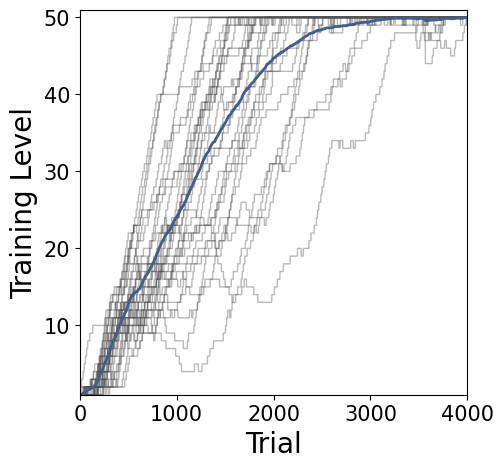

In [3]:
# 1. LOAD AND PROCESS DATA 
data = f1_data_dict['learning_curves_df']
# extract data from the df
training_level_by_trial = []
for row in data.training_level_by_trial.values:
    training_level_by_trial+=[literal_eval(row)]
# calculate mean curve and s-dev across trials 
mean_L_curve = mean_learning_curve(training_level_by_trial)
std = standard_dev_across_trials(training_level_by_trial)

# 2. PLOT
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
# plot each animal curve
for animal in training_level_by_trial:
    ax.plot(animal,label = str(animal), color = "#505152", alpha = 0.4,linewidth = 1)
# plot mean curve, smoothed over 5 trial window
window = 5
ax.plot(convolve_movmean(mean_L_curve,window), '-',color = "#415E89",linewidth = 2)
# set lims and axis labels
ax.set_xlim([0, 4000])
ax.set_ylim([1, 51])
plt.ylabel('Training Level',size = 20)
plt.xlabel('Trial',size = 20)
ax.tick_params(axis="y", labelsize=15)
ax.tick_params(axis="x", labelsize=15)


# FIGURE 1C

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_36560\3464392651.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Time', y='index', data=df[df['index'] > 0], palette=colors, edgecolor="white",size=5, jitter=0.4, ax=ax, orient='h')
C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_36560\3464392651.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(lst, fontsize=30)


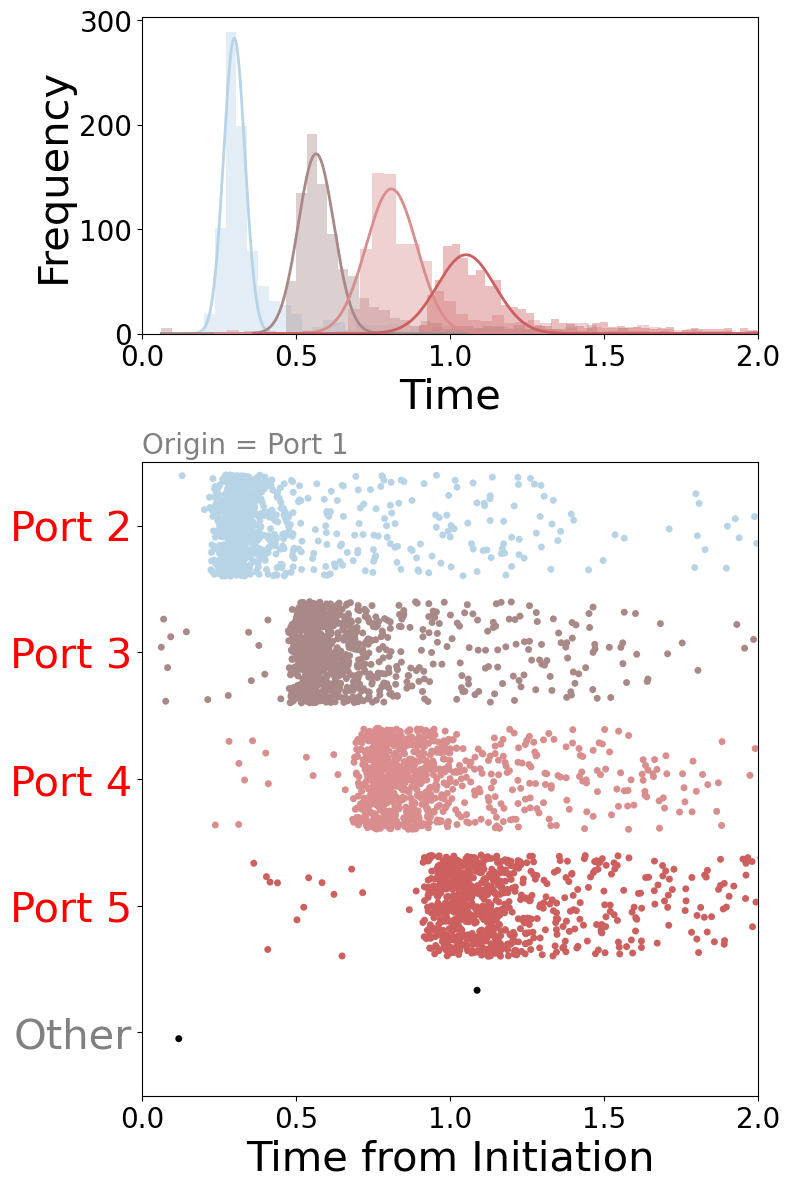

In [5]:
#1. LOAD DATA 
example_animal_df = f1_data_dict['example_animal_df']
P1Fitted_tfiltered_seqs = list(example_animal_df.loc[:, 'Sequence_ids'])
P1Fitted_tfiltered_times = list(example_animal_df.loc[:, 'Sequence_times'])
# set port codes
port1,port2,port3,port4,port5 = 2,1,6,3,7
a = np.array([0,1,2,3,4,5,6,7])
a = np.delete(a, [port1-1,port2-1,port3-1,port4-1,port5-1])
new_order = [port1-1] + [port2-1] + [port3-1] + [port4-1] + [port5-1] + list(a)
# process data and format for plotting
Port1Pokes = port_fitted_poke_times(P1Fitted_tfiltered_seqs, P1Fitted_tfiltered_times, port1, 6)
df = create_plotting_df(Port1Pokes, new_order)

# 2. PLOT Create figure and subplots
fig, (ax2, ax) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 2]},figsize=(8,12))
# Plot on ax (bottomsubplot)
colors = ["#B7D4E7","#A98888","#D98D8D","#CD5F5F","#000000"]
sns.stripplot(x='Time', y='index', data=df[df['index'] > 0], palette=colors, edgecolor="white",size=5, jitter=0.4, ax=ax, orient='h')
ax.set_xlabel('Time from Initiation', fontsize=30)
ax.set_ylabel('', fontsize=30)
ax.tick_params(axis="y", labelsize=20)
ax.tick_params(axis="x", labelsize=20)
ax.set_xlim(0, 2)
# y-axis tick labels and colors
all_indexes = list(df['index'].unique())
plottedports = []
for x in all_indexes:
    if x not in plottedports:
        plottedports.append(x)
lst = []
colors = []
start_port = 0 # set origin port 0-5
for index, portname in enumerate(plottedports):
    if portname == start_port:
        continue
    elif portname == 5:
        lst.append('Other')
        colors.append('grey')
    else:
        lst.append('Port ' + str((portname + 1)))
        colors.append('red')
ax.set_title('Origin = Port ' + str(start_port + 1), loc='left', fontsize=20, color='grey')
ax.set_yticklabels(lst, fontsize=30)
[t.set_color(i) for (i, t) in zip(colors, ax.yaxis.get_ticklabels())]

# Plot on ax2 (top subplot)
df = df[df['index'] < 5]
trial_split_data = dict(tuple(df.groupby('index')))
colors = ["#000000","#B7D4E7","#A98888","#D98D8D","#CD5F5F"]
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp(-(x - mean)**2 / (2 * standard_deviation ** 2))
bins_number = 100
for i, (_, data) in enumerate(trial_split_data.items()):
    if i > 0:
        x = list(data['Time'])
        bin_heights, bin_borders, _ = ax2.hist(x, bins=bins_number, label='histogram', color=colors[i], alpha=0.4)
        bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
        try:
            popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])
            x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
            ax2.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', color=colors[i], linewidth=2)
        except Exception:
            pass
ax2.set_xlabel('Time', fontsize=30)
ax2.set_ylabel('Frequency', fontsize=30)
ax2.tick_params(axis="both", labelsize=20)
ax2.set_xlim(0, 2)
# Adjust layout and display
fig.tight_layout()
plt.show()


# FIGURE1D

Text(0.5, 82.7222222222222, 'Start Port')

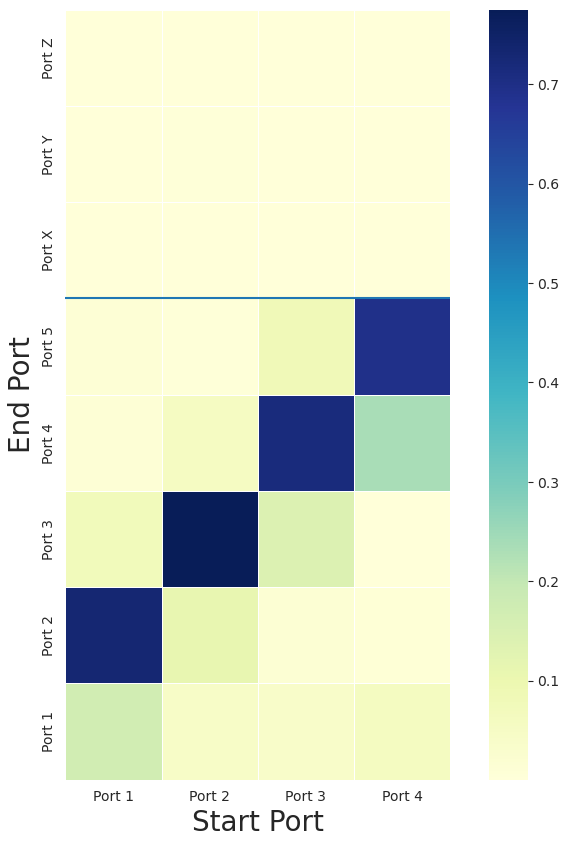

In [6]:
# 1. LOAD DATA
data = f1_data_dict['learning_curves_df']
# extract transition data from the df
trials_4000to5000_transitions = []
for row in data.trials_4000to5000_transitions.values:
    trials_4000to5000_transitions+=[literal_eval(row)]
# extract latency data from the df
trials_4000to5000_latency = []
for i,row in enumerate(data.trials_4000to5000_latency.values):
    row  = row.replace('nan', 'None')
    row = '[' + ', '.join(convert_float_string(x) for x in row.strip('[]').split(', ')) + ']'
    trials_4000to5000_latency+=[literal_eval(row)]
# extract latency data from the df
trials_4000to5000_relativestarttime= []
for row in data.trials_4000to5000_relativestarttime.values:
    row  = row.replace('nan', 'None')
    row = '[' + ', '.join(convert_float_string(x) for x in row.strip('[]').split(', ')) + ']'
    trials_4000to5000_relativestarttime+=[literal_eval(row)]
# set port codes
port1,port2,port3,port4,port5 = 2,1,6,3,7

#2 PROCESS DATA
# across animals port to port transitions
AA_Port_transits = []
for i in range(len(data.animal.values)):
    TimeFiltered_ids,TimeFiltered_times,Reference_times = CreateSequences_Time(trials_4000to5000_transitions[i],trials_4000to5000_latency[i],trials_4000to5000_relativestarttime[i],Transition_filter_time = 2.0)
    Port_transits = determime_heatmapdata(determineTransitionNumber(TimeFiltered_ids),port1,port2,port3,port4)
    AA_Port_transits = AA_Port_transits + [Port_transits]
# find average transition matrix  
AA_data= []
for animal in AA_Port_transits:
    flat_list = []
    for s_port in animal:
        normalised = list(np.array(s_port) / sum(s_port))
        flat_list = flat_list + normalised
    AA_data = AA_data + [flat_list]
concat_AA_data = conactinate_nth_items(AA_data)
# recreate transition matrix: 
means= [[]]*4
count = 0
index = 0
for item in concat_AA_data:
    means[index] = means[index] + [np.mean(item)]
    count = count + 1
    if count == 8:
        count = 0
        index = index + 1
a = np.array([0,1,2,3,4,5,6,7])
a = np.delete(a, [port1-1,port2-1,port3-1,port4-1,port5-1])
new_order = [port1-1] + [port2-1] + [port3-1] + [port4-1] + [port5-1] + list(a)
mean_Port_transits = reversedata(means,new_order)    
x_axis_labels = ['Port 1','Port 2','Port 3','Port 4'] # labels for x-axis
y_axis_labels = ['Port Z','Port Y','Port X','Port 5','Port 4','Port 3','Port 2','Port 1'] # labels for y-axis
mask = np.zeros_like(mean_Port_transits)

#3. PLOT
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    h1 = sns.heatmap(mean_Port_transits,xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                    linewidths=.5, mask=mask, square=True,cmap="YlGnBu",fmt = '',cbar_kws = dict(use_gridspec=False,location="right"))
#add seprrating line:
ax.hlines([3], *ax.get_ylim())
ax.set_ylabel('End Port',size = 20)
ax.set_xlabel('Start Port',size = 20)


# FIGURE1G

100%|██████████| 10000/10000 [00:18<00:00, 544.77it/s]


(0.0, 4000.0)

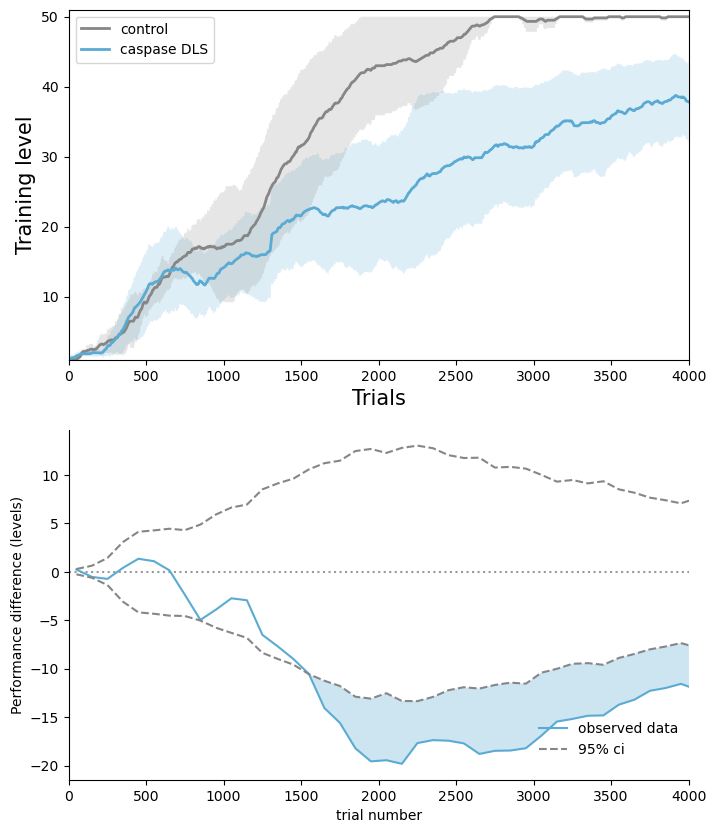

In [7]:

# 1. LOAD DATA - Read CSV
pl_data = example_animal_df = f1_data_dict['lesion_learning_curves_df']

# Masks
DLS_mask = pl_data.type == 'DLS'

# Extract data
categories = pl_data.catagory[DLS_mask].values
animals = pl_data.animal[DLS_mask].values
t_levels = parse_training_levels(pl_data.training_levels[DLS_mask].values)

# Calculate mean and std for lesion and control groups
lesion_mask = categories == 'lesion'
lesion_MeanLearningCurve, lesion_std = calculate_mean_std(t_levels, lesion_mask)

control_mask = categories == 'control'
control_MeanLearningCurve, control_std = calculate_mean_std(t_levels, control_mask)

# Plot
%matplotlib inline
window = 10
xlim = 4000

fig, [ax,ax2] = plt.subplots(2, 1, figsize=(8, 10))
ax.set_xlim([0, xlim])
ax.set_ylim([1, 51])

ax.plot(convolve_movmean(control_MeanLearningCurve[:xlim], window), '-', color="#868686", linewidth=2,label = 'control')
ax.plot(convolve_movmean(lesion_MeanLearningCurve[:xlim], window), '-', color='#5AABD3', linewidth=2,label = 'caspase DLS')

ax.set_xlabel('Trials', fontsize=15)
ax.set_ylabel('Training level', fontsize=15)

fill_between_mean_std(ax, lesion_MeanLearningCurve, lesion_std, "#5AABD3",xlim)
fill_between_mean_std(ax, control_MeanLearningCurve, control_std, "#868686",xlim)
ax.legend()


############ PLOT 2 - obsevred vs shuffle #########

# Set cut-off for number of trials to consider
cut = 4000
# Initialize lists to store data
new, group, cum_trials, animalid = [], [], [], []
# Process each item in t_levels
for index, item in enumerate(t_levels):
    new += item[0:cut]  # Append the first 'cut' elements of the current item
    group += cut * ['lesion' if index < len(t_levels) / 2 else 'control']  # Assign group
    animalid += [animals[index]] * cut  # Append animal ID
    cum_trials += list(np.linspace(1, cut, cut))  # Generate cumulative trial numbers
# Create DataFrame with collected data
df = pd.DataFrame({'CumTrials': cum_trials, 'Level': new, 'Group': group, 'ID': animalid})
# Define function to generate experimental group labels
def generate_eg(list_size, prob, hue_order):
    return [hue_order[0] if random.random() < prob else hue_order[1] for _ in range(list_size)]

# define a 100-trial window to bin the data
XBIN = 100
# Bin trial indices
df["TrialIndexBinned"] = (df.CumTrials.values // XBIN) * XBIN + XBIN / 2
# Group by 'ID', 'Group', 'TrialIndexBinned' and calculate mean
df_bintr = df.groupby(['ID', 'Group', 'TrialIndexBinned']).mean().reset_index()
df_bintr['Performance'] = df_bintr.Level
hue_order = ['control', 'lesion']
# Calculate performance difference between groups
perdif_df = df_bintr[df_bintr.Group == hue_order[0]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance'] - \
            df_bintr[df_bintr.Group == hue_order[1]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance']
# Select necessary columns
df_colsel = df_bintr[['ID', 'Group', 'TrialIndexBinned', 'Performance']].copy()
# Calculate probability for experimental group
exp_gr = [df_colsel[df_colsel.ID == x].Group.unique()[0] for x in df_colsel.ID.unique()]
cb_prob = sum([x == hue_order[0] for x in exp_gr]) / len(exp_gr)

# Seed for reproducibility
np.random.seed(124321)
# Shuffle results
shuff_res = []
# Shuffle and compute performance differences
NSH = 10000
for _ in tqdm(range(NSH)):
    exp_grs = generate_eg(len(exp_gr), cb_prob,hue_order)
    egs_dict = dict(zip(df_colsel.ID.unique(), exp_grs))
    df_colsel['egs'] = df_colsel.ID.map(egs_dict)
    diff = df_colsel[df_colsel.egs == hue_order[0]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance'] - \
           df_colsel[df_colsel.egs == hue_order[1]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance']
    shuff_res.append(diff)
shrdf = pd.concat(shuff_res)

# Calculate real data performance difference
real_data = df_colsel[df_colsel.Group == hue_order[0]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance'] - \
            df_colsel[df_colsel.Group == hue_order[1]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance']
real_data *= -1

# Plot results
pos_ci = shrdf.groupby('TrialIndexBinned').quantile(.95)
neg_ci = shrdf.groupby('TrialIndexBinned').quantile(.05)

ax2.axhline(0, ls='dotted', alpha=0.4, color='k')
ax2.plot(real_data, color='#5AABD3', label='observed data')
ax2.plot(pos_ci, linestyle='--', color='#868686', label='95% ci')
ax2.plot(neg_ci, linestyle='--', color='#868686')

x = pos_ci.reset_index().TrialIndexBinned
y1 = neg_ci.reset_index().Performance
y2 = real_data.reset_index().Performance

ax2.fill_between(x, y1, y2, where=y2 <= y1, facecolor='#5AABD3', alpha=.3, interpolate=True)
ax2.set_ylabel('Performance difference (levels)')
ax2.set_xlabel('trial number')
ax2.legend(loc=(0.75, 0.05), frameon=False)
ax2 = plt.gca()
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlim((0, 4000))


# FIGURE 1H

ShapiroResult(statistic=np.float64(0.9090658629201943), pvalue=np.float64(0.34753250776556216))
ShapiroResult(statistic=np.float64(0.8736275203969934), pvalue=np.float64(0.1635061934217838))
ShapiroResult(statistic=np.float64(0.9571178756704093), pvalue=np.float64(0.7936609035386166))
ShapiroResult(statistic=np.float64(0.6116372753706685), pvalue=np.float64(0.00037254912553241336))
-------------
Between-group change: Mann-Whitney p = 0.0003108003108003108
Rank-biserial r: 1.0


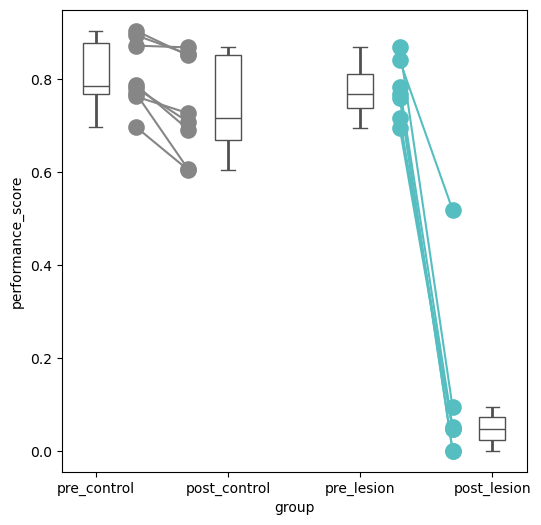

In [10]:
# 1 LOAD DATA - Read CSV
lesion_data = f1_data_dict['pre_post_lesion_data_df']
lesion_mask = lesion_data.type.values == 'lesion'
l_pre_mask = lesion_data[lesion_mask].Group.values == 'Pre Lesion'
l_post_mask = lesion_data[lesion_mask].Group.values == 'Post Lesion'
control_mask = lesion_data.type.values == 'control'
c_pre_mask = lesion_data[control_mask].Group.values == 'Pre Lesion'
c_post_mask = lesion_data[control_mask].Group.values == 'Post Lesion'

# 2. PROCESS data 
controls_temp = []
for index in range(len(lesion_data[control_mask][c_pre_mask].pscores.values)):
    pre_ = literal_eval(lesion_data[control_mask][c_pre_mask].pscores.values[index])
    post_ = literal_eval(lesion_data[control_mask][c_post_mask].pscores.values[index])
    controls_temp.append((pre_ + post_)[0:6])
lesions_temp = []
for index in range(len(lesion_data[lesion_mask][l_pre_mask].pscores.values)):
    pre_ = literal_eval(lesion_data[lesion_mask][l_pre_mask].pscores.values[index])
    post_ = literal_eval(lesion_data[lesion_mask][l_post_mask].pscores.values[index])
    lesions_temp.append((pre_ + post_)[0:6])
# extract means 
pre_c_means = []
post_c_means = []
for item in controls_temp:
    pre_c_means = pre_c_means + [np.mean(item[0:3])]
    post_c_means = post_c_means + [np.mean(item[3::])]
# extract means 
pre_l_means = []
post_l_means = []
for item in lesions_temp:
    pre_l_means = pre_l_means + [np.mean(item[0:3])]
    post_l_means = post_l_means + [np.mean(item[3::])]
    
# 3. PLOT 
fig, ax = plt.subplots(1, 1,figsize=(6,6))
scores = pre_c_means + post_c_means + pre_l_means + post_l_means
type_ = ['pre_control']*len(pre_c_means) + ['post_control']*len(post_c_means) + ['pre_lesion']*len(pre_l_means) + ['post_lesion']*len(post_l_means)
plot_df = pd.DataFrame({'group': type_, 'performance_score': scores})
ax=sns.boxplot( y = 'performance_score', x = 'group', data = plot_df, color = '#868686', width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)
for i in range(len(pre_c_means)):
    plt.plot([0.3,0.7],[pre_c_means[i],post_c_means[i]],'o-',color = '#868686', alpha = 1, markersize = 12,markeredgewidth=0)
for i in range(len(pre_l_means)):
    plt.plot([2.3,2.7],[pre_l_means[i],post_l_means[i]],'o-',color = '#56BEC1', alpha = 1, markersize = 12,markeredgewidth=0)
    
# 4. STATS 
for item in [pre_c_means, post_c_means, pre_l_means,post_l_means]:
    print(scipy.stats.shapiro(item))
print('-------------')
from scipy.stats import wilcoxon, mannwhitneyu
# Change scores
control_delta = np.array(pre_c_means) - np.array(post_c_means)
lesion_delta = np.array(pre_l_means) - np.array(post_l_means)
# Compare groups on change delta scores
u_stat, p = mannwhitneyu(control_delta, lesion_delta)
print("Between-group change: Mann-Whitney p =", p)
u_stat = min(u_stat, len(control_delta)*len(lesion_delta) - u_stat)
def rank_biserial(u, n1, n2):
    return 1 - (2 * u) / (n1 * n2)
rbr = rank_biserial(u_stat, len(control_delta), len(lesion_delta))
print("Rank-biserial r:", rbr)

# # Optional: check within-group changes
# w_stat_c, p_c = wilcoxon(control_before, control_after)
# w_stat_l, p_l = wilcoxon(lesion_before, lesion_after)
# print("Within control:", p_c, "Within lesion:", p_l)


# FIGURE j

c:\Users\Emmett Thompson\Documents\procedural_replay_paper_2025\figure1\Utilities\utils.py:73: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return data.applymap(lambda x: float(x) if isinstance(x, str) and x.replace('.','',1).isdigit() else x)


Shapiro-Wilk for ('ealry_learning',): W=0.932, p=0.432
Shapiro-Wilk for ('post',): W=0.819, p=0.114
Shapiro-Wilk for ('pre',): W=0.955, p=0.772
------------

ANOVA: F=16.805, p=0.000
ANOVA effect size (eta-squared): 0.651

Tukey HSD results:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------------
ealry_learning   post   1.3807 0.3249 -1.0051  3.7665  False
ealry_learning    pre  -4.5468 0.0004 -6.9326  -2.161   True
          post    pre  -5.9275 0.0001 -8.7251 -3.1299   True
------------------------------------------------------------

Pairwise Cohen's d:
('ealry_learning',) vs ('post',): d = -0.803
('ealry_learning',) vs ('pre',): d = 2.671
('post',) vs ('pre',): d = 3.276


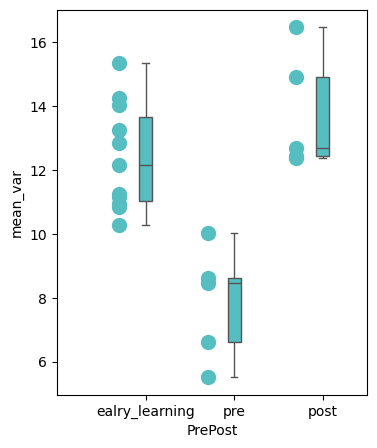

In [4]:
# 1. LOAD DATA
f1_data_dict = convert_loaded_data(f1_data_dict)
mean_tracking_var_df = f1_data_dict['tracking_variance_df']

# 2. PLOT 
fig,ax= plt.subplots(1, 1,figsize=(4, 5))
loc = [-0.3,1.7,0.7]
for i, group in enumerate(mean_tracking_var_df.groupby(['PrePost'])):
    dat = group[1].mean_var.values
    ax.plot([loc[i]]*len(dat),dat,'o', markersize = 10,color = '#56BEC1')
ort = 'v'
ax=sns.boxplot( x = 'PrePost', y = 'mean_var', data = mean_tracking_var_df, color = '#56BEC1', width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'#56BEC1', "zorder":10,'linewidth':1},\
showfliers=False, whiskerprops = {'linewidth':1, "zorder":10},\
saturation = 1, orient = ort, ax = ax)
ax.set_xlim(-1,2.5)

#3. STATS 
# Collect data per group
all_dat = []
groups = []
for i, (name, group) in enumerate(mean_tracking_var_df.groupby(['PrePost'])):
    dat = group.mean_var.values
    all_dat.append(dat)
    groups.append(name)
    # Normality check
    shapiro_stat, shapiro_p = scipy.stats.shapiro(dat)
    print(f'Shapiro-Wilk for {name}: W={shapiro_stat:.3f}, p={shapiro_p:.3f}')
print('------------')
# One-way ANOVA
f_stat, p_val = scipy.stats.f_oneway(*all_dat)
print(f"\nANOVA: F={f_stat:.3f}, p={p_val:.3f}")
# Effect size for ANOVA: eta-squared
# eta^2 = SS_between / SS_total
group_means = [np.mean(d) for d in all_dat]
grand_mean = np.mean(np.concatenate(all_dat))
ss_between = sum([len(d) * (m - grand_mean)**2 for d, m in zip(all_dat, group_means)])
ss_total = sum([(x - grand_mean)**2 for d in all_dat for x in d])
eta2 = ss_between / ss_total
print(f"ANOVA effect size (eta-squared): {eta2:.3f}")

# Pairwise Tukey HSD
tukey_results = pairwise_tukeyhsd(mean_tracking_var_df.mean_var.values,
                                  mean_tracking_var_df.PrePost.values)
print("\nTukey HSD results:")
print(tukey_results)

print("\nPairwise Cohen's d:")
for (i1, i2) in combinations(range(len(all_dat)), 2):
    d = cohen_d(all_dat[i1], all_dat[i2])
    print(f"{groups[i1]} vs {groups[i2]}: d = {d:.3f}")



# FIGURE l 

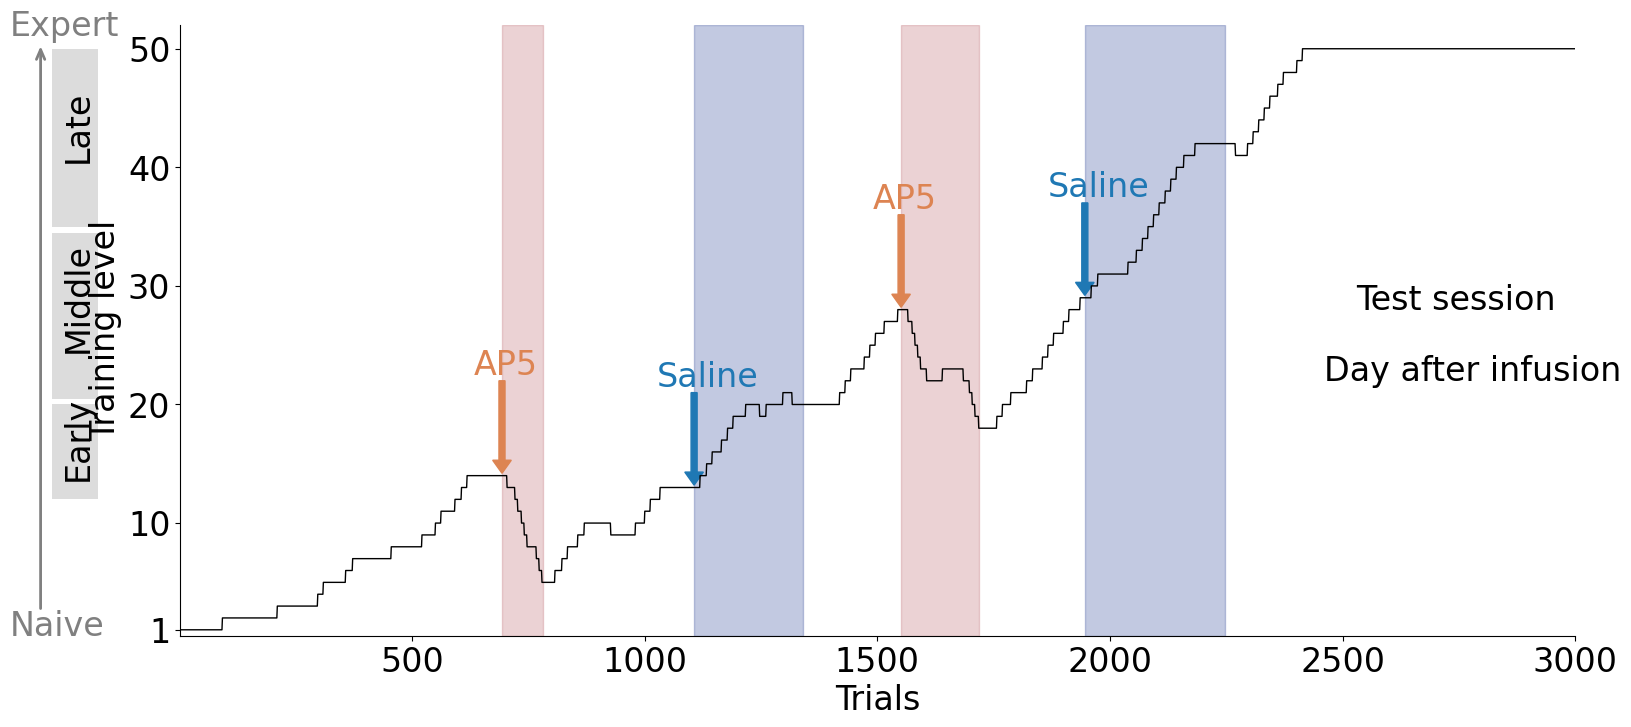

In [11]:
# load data from dict and convert from strings (h5 storing  for jagged lists)
all_TrainingLevels= [list(map(np.uint8, eval(s.replace("np.uint8", "int")))) for s in f1_data_dict['AP5_all_TrainingLevels']]

# call function to plot
make_example_infusion_plot(all_TrainingLevels)

# FIGURE m

In [17]:
df['Start level'][0]

np.float64(14.0)

In [12]:
list(f1_data_dict)

['AP5_all_TrainingLevels',
 'AP5_df',
 'example_animal_df',
 'learning_curves_df',
 'lesion_learning_curves_df',
 'pre_post_lesion_data_df',
 'tracking_variance_df']

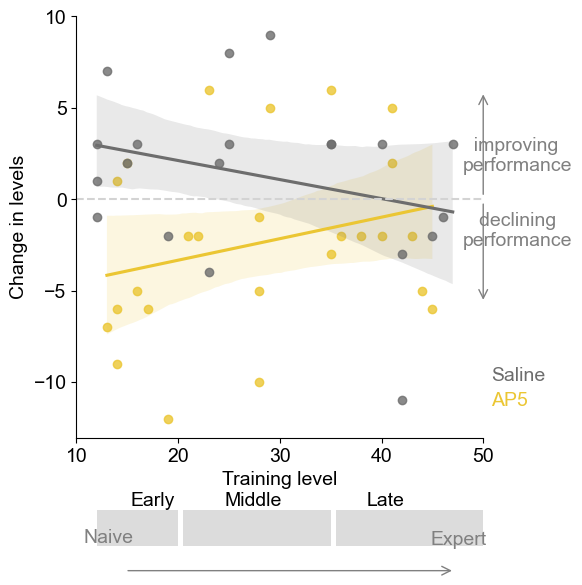

In [32]:
# load data
df = f1_data_dict['AP5_df']
# convert negaitve numbers back to floats
df["Change in levels"] = df["Change in levels"].values.astype(float)
# plot
c1 =  "#EBC633" 
c2 =  "#6D6D6D"#"#1f78b4" #"#2b7bba"
my_palette = [c1, c2] 
my_palette = sns.set_palette(sns.color_palette(my_palette))
ax = sns.lmplot(x="Start level", y="Change in levels", hue="Infusion",data=df, palette = my_palette, 
              height=5, aspect=1)
sns.set_theme(style="white", font_scale = 1.3)
sns.despine()
fnt = 14
plt.xlabel("Training level", c = "black", fontsize = fnt) #"Culmen Length (mm)",fontweight ='bold', size=14)
plt.xticks([10, 20,30,40, 50], c = "black", fontsize = fnt)
plt.ylabel("Change in levels", c = "black", fontsize = fnt)
plt.yticks(c = "black", fontsize = fnt)
sns.set_style('ticks')  # white style with tick marks
plt.text(0.2385, -0.02, "Early", transform=plt.gcf().transFigure, fontsize = fnt, c = "black") 
plt.gca().add_patch(plt.Rectangle((12, -19), 8, 2, facecolor='gainsboro',clip_on=False,linewidth = 0))
plt.text(0.398, -0.02, "Middle", transform=plt.gcf().transFigure, fontsize = fnt, c = "black")
plt.gca().add_patch(plt.Rectangle((20.5,-19), 14.5, 2, facecolor='gainsboro',clip_on=False,linewidth = 0))
plt.text(0.637, -0.02, "Late", transform=plt.gcf().transFigure, fontsize = fnt, c = "black")  #color = "black",
plt.gca().add_patch(plt.Rectangle((35.5,-19),14.5, 2,facecolor='gainsboro',clip_on=False,linewidth = 0))
plt.text(0.16, -0.093, 'Naive', color = "gray",  transform=plt.gcf().transFigure, fontsize = fnt)
plt.text(0.745, -0.097, 'Expert', color = "gray",  transform=plt.gcf().transFigure, fontsize = fnt)
arrow_pos = -0.315
plt.annotate('', xy = (0.93, arrow_pos), xycoords='axes fraction', xytext=(0.12, arrow_pos), 
            arrowprops=dict(arrowstyle="->", color='gray'))
plt.text(0.847, 0.18, 'AP5', color = c1, transform=plt.gcf().transFigure, fontsize = fnt)
plt.text(0.847, 0.23, 'Saline', color = c2, transform=plt.gcf().transFigure, fontsize = fnt)
plt.axhline(y=0, ls='--', c='lightgrey') 
plt.text(0.8, 0.65, '  improving \nperformance', color = "grey", transform=plt.gcf().transFigure, fontsize = fnt)
plt.text(0.8, 0.5, '   declining \nperformance', color = "grey", transform=plt.gcf().transFigure, fontsize = fnt)
arrow_pos = 1
plt.annotate('', xy = (arrow_pos, 0.82), xycoords='axes fraction', xytext=(arrow_pos, 0.57), 
            arrowprops=dict(arrowstyle="->", color='grey'))
plt.annotate('', xy = (arrow_pos, 0.32), xycoords='axes fraction', xytext=(arrow_pos, 0.56), 
            arrowprops=dict(arrowstyle="->", color='grey'))
ax._legend.remove()

plt.show()

# FIGURE n

C:\Users\Emmett Thompson\AppData\Local\Temp\ipykernel_12968\1636156566.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.swarmplot(x="Infusion", y="Change in levels", order=["Saline", "AP5"],


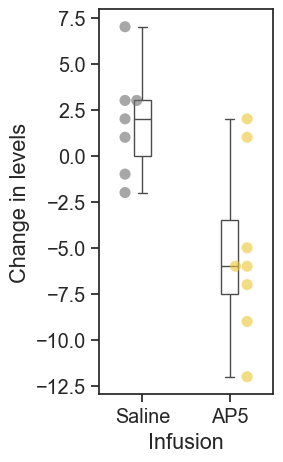

In [33]:
# load data
df = f1_data_dict['AP5_df']
# convert negaitve numbers back to floats
df["Change in levels"] = df["Change in levels"].values.astype(float)

early_label = 'early (levels 12-' + str(20) + ')'
early_df = df[df["Training stage"] == early_label]

# plot
c1 =  "#EBC633" 
c2 =  "#6D6D6D"
my_palette = [c2, c1] 

plt.figure(figsize=(2.25, 5))
ax = sns.boxplot(x="Infusion", y="Change in levels", linewidth=1, saturation = 1, data=early_df,width = 0.2, 
                 order=["Saline", "AP5"], showfliers=False,
                 medianprops={"linewidth": 1, "solid_capstyle": "butt"},boxprops = {"facecolor": 'none'}) 

ax = sns.swarmplot(x="Infusion", y="Change in levels", order=["Saline", "AP5"],
                   data=early_df, dodge = True, size=8, alpha = 0.6, palette = my_palette)
